# Imports

In [59]:
from torch import nn
import torch
from torchvision import models
from torchvision import transforms as tfms
import pickle
from PIL import Image

# Resnet pre-treinada

In [3]:
resnet = models.resnet18(pretrained=True)

In [4]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

# 

In [11]:
net = []
for param in resnet.children():
    net.append(param)

In [12]:
net2 = net[:-2]

In [15]:
model = nn.Sequential(*net2)

In [16]:
del resnet, net

# Pegando imagem

In [22]:
with open('dataset.pickle', 'rb') as handle:
        dataset = pickle.load(handle)

In [46]:
img = Image.open('../data/cats/'+dataset['treino'][0]).resize((256, 256))

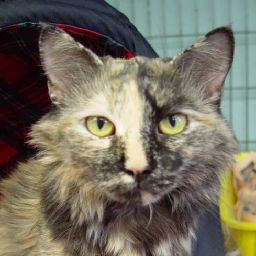

In [47]:
img

In [48]:
img_tensor = tfms.ToTensor()(img)

In [49]:
out = model(img_tensor.unsqueeze(0))

In [50]:
out.shape

torch.Size([1, 512, 8, 8])

In [56]:
class CatAndDogModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(512, 1, kernel_size=8)
        
    def forward(self, x):
        return self.conv1(x).squeeze()

In [57]:
mdl = CatAndDogModel()

In [60]:
prob = torch.sigmoid(mdl(out))

In [61]:
prob

tensor(0.1338, grad_fn=<SigmoidBackward>)